# **Exit Characteristics and Patterns of London Underground Stations**<br>
##### by Kweku Acquaye<br> 
This report uses modern data science methods to analyse data for patterns and characteristics of exits from the London underground stations. The data was generated by Transport for London (TfL) in 2017 and relates to a typical working week day.

### Table of Contents
> Exploratory Data Analysis (EDA)<br>
Preliminary Analysis for Further Insight before Task<br>
>> Section A: Dataframes<br>
Section A.1: Creating Task-specific Dataframes<br>
Section A.2: Individual Peak Hourly Exits for All Stations<br>
Section A.3: Visualisation of Total Peak Hourly Exits<br>

> Part 1: Morning and Evening Peak Proportions<br>
>> Section 1.1: Morning Peak Proportions
>>> Section 1.1.1: Peak AM hourly Exits per Station<br>
Section 1.1.2: The AM Peak Count as a Proportion (percentage) of the Daily Total for all Stations


>> Section 1.2: Evening Peak Proportions<br>
>>> Section 1.2.1: Peak PM Hourly Exits per Station<br>
Section 1.2.2: The PM Peak Count as a Proportion (percentage) of the Daily Total for All Stations

> Part 2: Plotting and Analysing Distributions<br>
>> Section 2: Peak Proportions (in percentages) of Daily Total per Station<br>
Section 2.1: Morning Peak Distributions<br>
>>> Section 2.1.1: Proportion of AM Peak Exits in North-to-South Cross-section<br>
Section 2.1.2: Histogram of AM Peak Proportions for All Stations


>> Section 2.2: Evening Peak Distributions
>>> Section 2.2.1: Proportion of PM Peak Exits in North-to-South Cross-section<br>
Section 2.2.2: Histogram of PM Peak Proportions for All Stations

> Part 3: Classification of Stations
>> Section 3.1: Classification Dataframes<br>
>>> Section 3.1.1: Morning Peak Proportions as a Column in Dataframe<br>
Section 3.1.2: Evening Peak Proportions as a Column in Dataframe<br>


>> Section 3.2: Classifying All Stations<br>
Section 3.3: Classifying Given Stations

> Observations<br>
>> Section 3.4: Distribution of All Hourly Exits for Subset of Northern Line Stations in north-to-south order

> Section 4: Further Evidence in Support of Explanation<br>
>> Section 4.1: West-to-East AM Peak Proportions<br>
Section 4.2: West-to-East PM Peak Proportions<br>
Section 4.3: Distribution of All Hourly Exits for Subset of Central Line Stations in west-to-east order

> Conclusion(s)

***

In [ ]:
# Importing libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Libraries imported.")

Libraries imported.


In [ ]:
# Loading original data
original_df = pd.read_csv('hourlyExits.csv', index_col='Station')
print("Original data loaded.")

Original data loaded.


To preserve integrity of original data file from accidental alteration, analysis would be carried out on a copy.

In [ ]:
# Creating copy to preserve original data file
safe_df1 = original_df.copy()
print("Copied version created as follows:")
safe_df1

Copied version created as follows:


,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## **Exploratory Data Analysis (EDA)**

In [ ]:
safe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, Acton Town to Woodside Park
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   H05     268 non-null    int64
 1   H06     268 non-null    int64
 2   H07     268 non-null    int64
 3   H08     268 non-null    int64
 4   H09     268 non-null    int64
 5   H10     268 non-null    int64
 6   H11     268 non-null    int64
 7   H12     268 non-null    int64
 8   H13     268 non-null    int64
 9   H14     268 non-null    int64
 10  H15     268 non-null    int64
 11  H16     268 non-null    int64
 12  H17     268 non-null    int64
 13  H18     268 non-null    int64
 14  H19     268 non-null    int64
 15  H20     268 non-null    int64
 16  H21     268 non-null    int64
 17  H22     268 non-null    int64
 18  H23     268 non-null    int64
 19  H00     268 non-null    int64
 20  H01     268 non-null    int64
dtypes: int64(21)
memory usage: 46.1+ KB


The above output shows source dataset has no missing data, i.e. 268 non-null cells in all columns.

The summary below shows hourly statistics including quartiles for all stations for an entire day:

In [ ]:
safe_df1.describe()

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,40.152985,310.932836,1002.500000,1830.466418,1716.802239,837.861940,654.660448,675.477612,703.645522,706.742537,...,1084.298507,1571.350746,1821.906716,1181.533582,676.231343,503.380597,470.555970,385.634328,185.380597,31.477612
std,75.432703,532.327983,1657.672341,3387.446351,3225.049818,1417.173079,1081.766928,1103.498816,1091.340830,1042.136212,...,1580.260376,2326.870125,2399.760226,1406.578872,802.860568,603.686729,597.837445,474.397707,199.524145,39.294569
min,0.000000,0.000000,9.000000,11.000000,7.000000,11.000000,8.000000,14.000000,14.000000,6.000000,...,51.000000,96.000000,85.000000,41.000000,23.000000,21.000000,15.000000,14.000000,0.000000,0.000000
25%,5.000000,50.000000,182.250000,290.000000,178.750000,115.750000,112.750000,134.750000,157.000000,188.750000,...,359.500000,500.250000,643.500000,423.500000,232.750000,177.250000,155.500000,131.500000,61.000000,6.000000
50%,12.000000,119.000000,413.500000,579.000000,447.000000,284.500000,237.500000,266.000000,312.500000,343.000000,...,611.000000,878.000000,1094.000000,733.500000,409.500000,310.000000,285.500000,237.000000,119.000000,19.000000
75%,40.000000,334.000000,1052.750000,1751.000000,1527.250000,772.000000,638.000000,647.000000,710.750000,780.000000,...,1158.500000,1677.500000,2025.250000,1393.750000,854.500000,604.500000,563.000000,477.750000,239.000000,42.500000
max,500.000000,3497.000000,12830.000000,27069.000000,22522.000000,11432.000000,8855.000000,8888.000000,8428.000000,7290.000000,...,12953.000000,23289.000000,23244.000000,12608.000000,6562.000000,4825.000000,4941.000000,3870.000000,1349.000000,296.000000


On a typical weekday, the distribution of hourly total exits for all stations is as follows:

<AxesSubplot:title={'center':'Figure A: Distribution of Hourly Exits across All Stations'}, xlabel='Hour', ylabel='Number of Exits'>

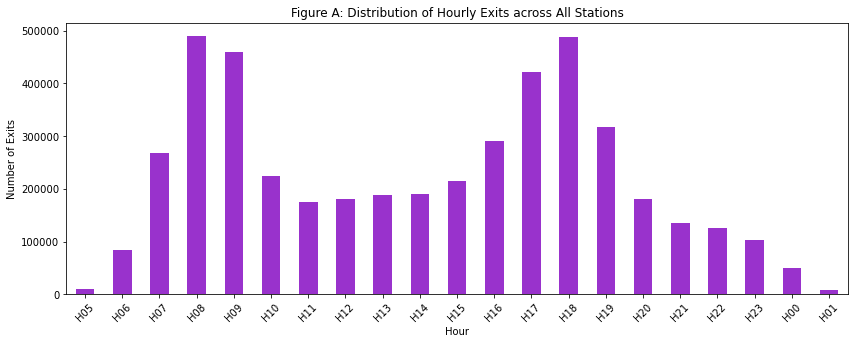

In [ ]:
# Visualising sum of all hours per station in one day
sdf_sm = safe_df1.sum()
sdf_sm.plot(kind='bar', title ='Figure A: Distribution of Hourly Exits across All Stations', xlabel='Hour', 
                               ylabel='Number of Exits', figsize=(14,5), color='darkorchid', rot=45)

**Observations:**<br>
The obtained distribution in Figure A is bimodal, showing two peaks corresponding to morning and evening rush hours. Because the bimodality is not arcsine in nature but has tails on either end, calculating a mean value and other summary statistics would provide little information value beyond the the minimum, the maximum, and the median. Summary statistics of the isolated peaks may have better information value.

In [ ]:
# Preserving safe_df1 for later use
safe_df2 = safe_df1.copy()
print("safe_df2 created")

safe_df2 created


## **Preliminary Analysis for Further Insight before Task**

It is common to divide the operation of the underground into 6
periods:<br>
<div>
<img src= "https://drive.google.com/uc?id=1J349hk7kZUea69chfOD-3skjwWBknkuq" alt= "PictureOfTable" width=500/>
</div>

**Section A: Dataframes**

> **Section A.1: Creating Task-specific Dataframes**<br>
This task focuses on "Peak AM" and "Peak PM" paek counts and proportions, which comprise the hours 0700, 0800, 0900 and hours 1600, 1700 and 1800 respectively. The following step creates and calculates values for three new columns for further observation and calculations - total AM peak, total PM peak, and all-day totals.

In [ ]:
# Creating new columns for this task by summing peak hours
safe_df2['Total_AMPeak'] = safe_df2['H07'] + safe_df2['H08'] + safe_df2['H09']
safe_df2['Total_PMPeak'] = safe_df2['H16'] + safe_df2['H17'] + safe_df2['H18']
safe_df2['All_DayTotal'] = safe_df2.sum(axis=1)
print("Summed peak columns added")

Summed peak columns added


> **Section A.2: Individual Peak Hourly Exits for All Stations**<br>
The following steps removes all columns except task-specific columns, and creates further requisite dataframes:

In [ ]:
# Creating new dataframe by removing all columns except peak hours columns
task_df1 = safe_df2.filter(['H07', 'H08', 'H09', 'H16', 'H17', 'H18'], axis=1)
task_df1

,H07,H08,H09,H16,H17,H18
Station,,,,,,
Acton Town,710,812,448,634,917,1077
Aldgate,1319,3076,3013,721,1116,1155
Aldgate East,1192,3045,3381,935,1263,1605
Alperton,230,372,254,444,679,724
Amersham,82,246,96,364,409,692
...,...,...,...,...,...,...
Wimbledon Park,173,192,132,283,364,467
Wood Green,450,831,884,1554,2334,2606
Wood Lane,441,594,763,455,665,646


Summary statistics for **individual** peak hourly exits across all stations are:

Summed peak hourly exits for all stations are:

In [ ]:
# Creating new dataframe of summed columns only
task_df2 = safe_df2.filter(['Total_AMPeak', 'Total_PMPeak', 'All_DayTotal'], axis=1)
task_df2

,Total_AMPeak,Total_PMPeak,All_DayTotal
Station,,,
Acton Town,1970,2628,13960
Aldgate,7408,2992,26536
Aldgate East,7618,3803,32627
Alperton,856,1847,7821
Amersham,424,1465,5794
...,...,...,...
Wimbledon Park,497,1114,4907
Wood Green,2165,6494,27648
Wood Lane,1798,1766,10174


Summary statistics for **summed** peak hourly exits across all stations are:

In [ ]:
task_df2.describe()

,Total_AMPeak,Total_PMPeak,All_DayTotal
count,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,26221.802239
std,8181.784059,6276.463316,36541.138132
min,27.000000,239.000000,862.000000
25%,677.500000,1471.750000,7232.750000
50%,1517.000000,2622.000000,13406.000000
75%,4315.250000,4707.750000,29679.500000
max,61116.000000,59486.000000,231873.000000


> **Section A.3: Visualisation of Total Peak Hourly Exits**<br>
The distribution of peak hourly total exits for all stations is can be visualised as:

<AxesSubplot:title={'center':'Figure B: Distribution of Peak Hourly Exits across All Stations'}, xlabel='Hour', ylabel='Number of Exits'>

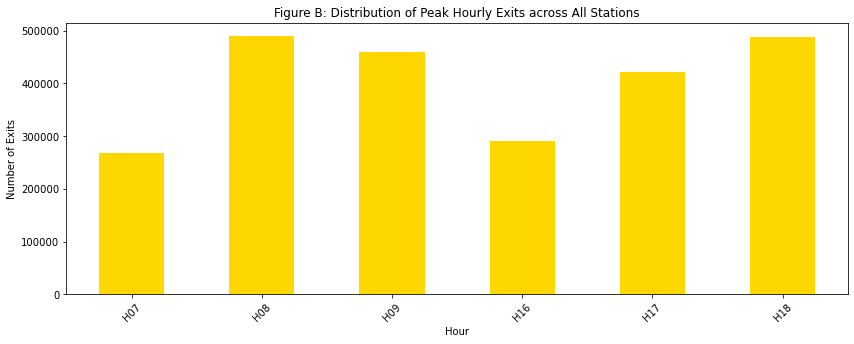

In [ ]:
# Visualising peak hourly exits across all stations
tdf1_sm = task_df1.sum()
tdf1_sm.plot(kind='bar', title ='Figure B: Distribution of Peak Hourly Exits across All Stations', xlabel='Hour', 
                               ylabel='Number of Exits', figsize=(14,5), color='gold', rot=45)

From Figure B, the distribution is obsevered to be not symmetric but bimodal, with peaks at hour 8 and hour 18 respectively. The distribution can be described as bimodality with respect to time.

## **Part 1: Morning and Evening Peak Proportions**

> **Section 1.1: Morning Peak Proportions**

> **Section 1.1.1: Peak AM hourly Exits per Station:**

In [ ]:
# Peak AM only dataframe
AM_Peak_df = safe_df2.filter(['H07', 'H08', 'H09'], axis=1)
AM_Peak_df

,H07,H08,H09
Station,,,
Acton Town,710,812,448
Aldgate,1319,3076,3013
Aldgate East,1192,3045,3381
Alperton,230,372,254
Amersham,82,246,96
...,...,...,...
Wimbledon Park,173,192,132
Wood Green,450,831,884
Wood Lane,441,594,763


> **Section 1.1.2: The AM Peak Count as a Proportion (percentage) of the Daily Total for all Stations:**

In [ ]:
# Calculating AM peak proportions
am_peak_prop = pd.DataFrame().assign(AM_Peak_Propn = ( (AM_Peak_df['H07'] + AM_Peak_df['H08'] + AM_Peak_df['H09']) / task_df2['All_DayTotal'])) * 100
print("AM peak proportions calculated")

AM peak proportions calculated


> **Table 1.1: Morning Peak Proportion per Station**

In [ ]:
# Rounding to whole numbers
am_peak_prop = round(am_peak_prop)
am_peak_prop

,AM_Peak_Propn
Station,
Acton Town,14.0
Aldgate,28.0
Aldgate East,23.0
Alperton,11.0
Amersham,7.0
...,...
Wimbledon Park,10.0
Wood Green,8.0
Wood Lane,18.0


Table 1.1 shows the proportion (in percentage) of the total exits that occur in the morning peak hours for each station.

> **Table 1.2: Summary Statistics of Morning Peak Proportions**

In [ ]:
am_peak_prop.describe()

,AM_Peak_Propn
count,268.000000
mean,13.555970
std,7.416996
min,3.000000
25%,8.000000
50%,11.000000
75%,17.000000
max,37.000000


From Table 1.2, it is seen that the morning peak proportions for all stations has a median of 11%, with interquartile range from 8 to 17% and a mean morning proportion of 13.6%. The highest proportion is 37%.

**Section 1.2: Evening Peak Proportions**

> **Section 1.2.1: Peak PM Hourly Exits per Station:**

In [ ]:
# Peak PM only dataframe
PM_Peak_df = safe_df2.filter(['H16', 'H17', 'H18'], axis=1)
PM_Peak_df

,H16,H17,H18
Station,,,
Acton Town,634,917,1077
Aldgate,721,1116,1155
Aldgate East,935,1263,1605
Alperton,444,679,724
Amersham,364,409,692
...,...,...,...
Wimbledon Park,283,364,467
Wood Green,1554,2334,2606
Wood Lane,455,665,646


> **Section 1.2.2: The PM Peak Count as a Proportion (percentage) of the Daily Total for All Stations:**

In [ ]:
# Calculating PM peak proportions
pm_peak_prop = pd.DataFrame().assign(PM_Peak_Propn = ( (PM_Peak_df['H16'] + PM_Peak_df['H17'] + PM_Peak_df['H18']) / task_df2['All_DayTotal'])) * 100
print("PM peak proportions calculated")

PM peak proportions calculated


> **Table 1.3: Evening Peak Proportion per Station**

In [ ]:
# Rounding to whole numbers
pm_peak_prop = round(pm_peak_prop)
pm_peak_prop

,PM_Peak_Propn
Station,
Acton Town,19.0
Aldgate,11.0
Aldgate East,12.0
Alperton,24.0
Amersham,25.0
...,...
Wimbledon Park,23.0
Wood Green,23.0
Wood Lane,17.0


> **Table 1.4: Summary Statistics of Evening Peak Proportions**

In [ ]:
pm_peak_prop.describe()

,PM_Peak_Propn
count,268.000000
mean,19.955224
std,5.929506
min,5.000000
25%,16.000000
50%,21.000000
75%,24.000000
max,32.000000


From Table 1.4, it is seen that the evening peak proportions for all stations has a median of 21%, with interquartile range from 16 to 24% and a mean evening proportion of 20%. The highest proportion is 32%.

## **Part 2: Plotting and Analysing Distributions**<br>
### **Section 2: Peak Proportions (in percentages) of Daily Total per Station:**
**Section 2.1: Morning Peak Distributions**

> **Section 2.1.1: Proportion of AM Peak Exits in North-to-South Cross-section:**

> Attempting to visualise proportions of all stations in alphabetical order in a single plot would yield no usable information, hence a selection of stations representing a north-to-south cross-section of the city is used in that order:

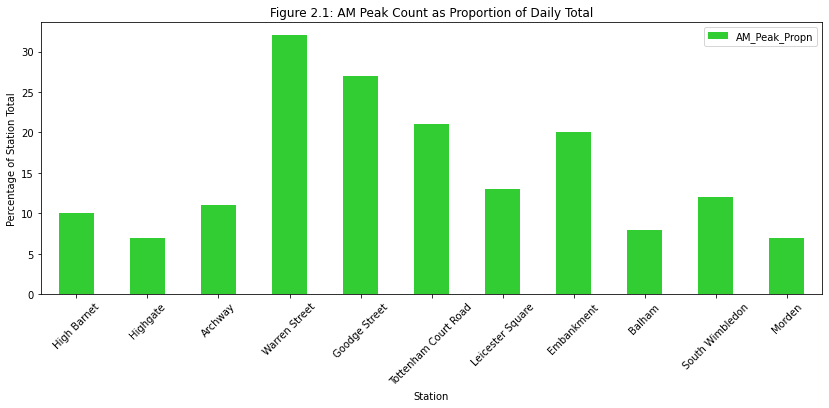

In [ ]:
# Visualising north-to-south AM peak proportions
am_peak_prop_visual = am_peak_prop.loc[['High Barnet', 'Highgate', 'Archway', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 
                                        'Leicester Square', 'Embankment', 'Balham', 'South Wimbledon', 'Morden']]
ax1 = am_peak_prop_visual.plot(kind='bar', title='Figure 2.1: AM Peak Count as Proportion of Daily Total', xlabel='Station', 
                               ylabel='Percentage of Station Total', figsize=(14,5), color='limegreen', rot=45)

From Figure 2.1, it is observed that although the distribution of morning peak exit proportions in stations across the city (geographically from north to south) is bimodal, there is a somewhat overarching element of unimodality to it with the highest proportions in the centre of the city. This is expected as most work offices, businesses and enterprises are likely to be centrally located. This distribution can be described as bimodality with respect to location.

> **Section 2.1.2: Histogram of AM Peak Proportions for All Stations:**

<Figure size 432x288 with 0 Axes>

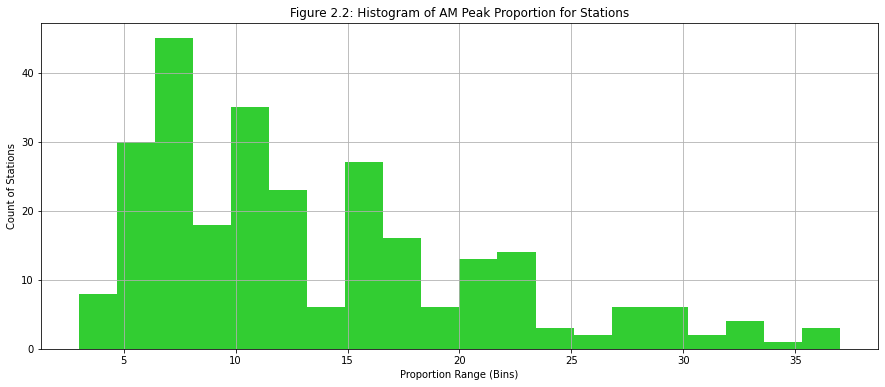

In [ ]:
# Plotting histogram of am peak proportions
fig = plt.figure()
ax2 = am_peak_prop.hist(bins=20, figsize=(15,6), color='limegreen')
plt.title('Figure 2.2: Histogram of AM Peak Proportion for Stations')
plt.xlabel('Proportion Range (Bins)')
plt.ylabel('Count of Stations')
plt.plot()
plt.show()

A histogram of morning peak proportions (Figure 2.2) exhibits no symmetry or Normality, but shows a positive skew. This is expected, as bin counts (i.e. number of stations) with high exit proportions is expected to decrease progressively with increase in proportion. From the histogram, the value of 25 has been selected as the threshold (i.e. top 25%) for the busiest stations.

**Sectin 2.2: Evening Peak Distributions**

> **Section 2.2.1: Proportion of PM Peak Exits in North-to-South Cross-section:**

> Again, attempting to visualise proportions of all stations in alphabetical order in a single plot would yield no usable information, hence the same selection of stations previously used in representing a north-to-south cross-section of the city is used in that order:

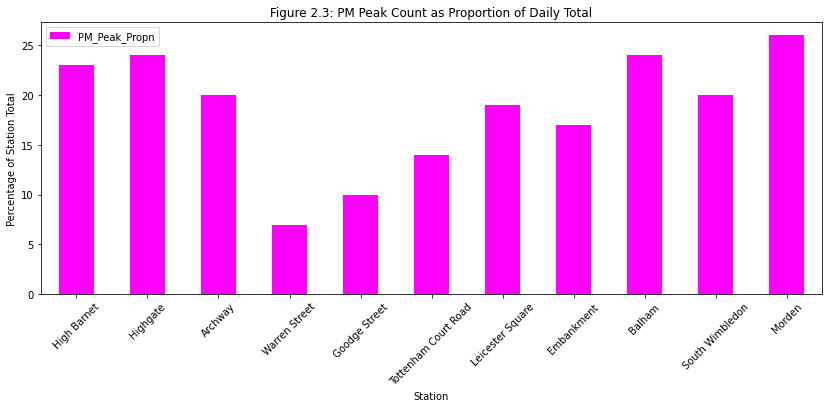

In [ ]:
# Visualising north-to-south PM peak proportions
pm_peak_prop_visual = pm_peak_prop.loc[['High Barnet', 'Highgate', 'Archway', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 
                                        'Leicester Square', 'Embankment', 'Balham', 'South Wimbledon', 'Morden']]
ax5 = pm_peak_prop_visual.plot(kind='bar', title='Figure 2.3: PM Peak Count as Proportion of Daily Total', xlabel='Station', ylabel='Percentage of Station Total',
                               figsize=(14,5), color='fuchsia', rot=45)

A plot of distribution of evening peak proportions (Figure 2.3) of exits in stations geographically across the city is also observed to be bimodal. However, unlike the morning peak distribution, the evening peak distribution tends towards an arcsine distribution, with the highest proportions towards the both ends/extremities. This is also expected as most residential homes are likely to be increasingly located on the outskirts. This distribution can also be described as bimodality with respect to location.

> **Section 2.2.2: Histogram of PM Peak Proportions for All Stations:**

<Figure size 432x288 with 0 Axes>

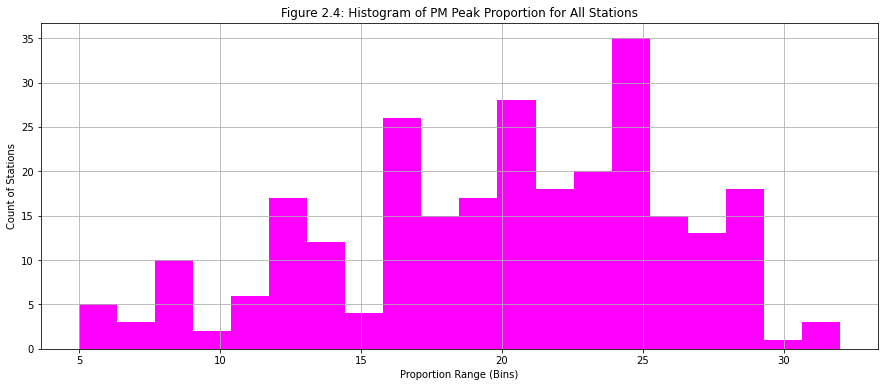

In [ ]:
# Plotting histogram of PM peak proportions 
fig = plt.figure()
ax6 = pm_peak_prop.hist(bins=20, figsize=(15,6), color='fuchsia')
plt.title('Figure 2.4: Histogram of PM Peak Proportion for All Stations')
plt.xlabel('Proportion Range (Bins)')
plt.ylabel('Count of Stations')
plt.plot()
plt.show()

Figure 2.4 shows a histogram of evening peak proportions and exhibits no symmetry or Normality, but unlike the morning proportions histogram shows a negative skew. This is also expected, as bin counts (i.e. number of stations) with high exit proportions is expected to increase with increase in proportion up to a point before tailing off sharply. From the histogram, the value of 25 has been selected as the threshold (i.e. top 25%) for the busiest stations.

## **Part 3: Classification of Stations**

The exit patterns observed above can be used to classify stations with high AM peak proportions as mainly "Work" areas, high PM peak proportions as mainly "Residential" areas, and stations with approximately equal AM and PM exit peaks as "Other" districts.<br>
<br>
In this analysis the threshold for classifying stations as "Work" or "Residential" was chosen as the top 25% highest peak proportions of morning and evening exits respectively. This gives the top 66 out of 268 stations in each case. This threshold was chosen because in looking at the histograms (Figures 2.2 and 2.4), the uppermost quartile (inclusive) were judged to be sufficiently upper bounded to make this classification.

**Section 3.1: Classification Dataframes**

> **Section 3.1.1: Morning Peak Proportions as a Column in Dataframe**

In [ ]:
left = task_df2
print("left assigned")

left assigned


In [ ]:
right = am_peak_prop
print("right assigned")

right assigned


In [ ]:
classn_df1 = pd.merge(left, right, on="Station")
classn_df1

,Total_AMPeak,Total_PMPeak,All_DayTotal,AM_Peak_Propn
Station,,,,
Acton Town,1970,2628,13960,14.0
Aldgate,7408,2992,26536,28.0
Aldgate East,7618,3803,32627,23.0
Alperton,856,1847,7821,11.0
Amersham,424,1465,5794,7.0
...,...,...,...,...
Wimbledon Park,497,1114,4907,10.0
Wood Green,2165,6494,27648,8.0
Wood Lane,1798,1766,10174,18.0


In [ ]:
# Deducing number of stations in top 25% AM peak proportions
work = classn_df1.loc[classn_df1.AM_Peak_Propn > 17].copy()
len(work)

66

> **Section 3.1.2: Evening Peak Proportions as a Column in Dataframe**

In [ ]:
left = classn_df1
print("left assigned")

left assigned


In [ ]:
right = pm_peak_prop
print("right assigned")

right assigned


In [ ]:
classn_df2 = pd.merge(left, right, on="Station")
classn_df2

,Total_AMPeak,Total_PMPeak,All_DayTotal,AM_Peak_Propn,PM_Peak_Propn
Station,,,,,
Acton Town,1970,2628,13960,14.0,19.0
Aldgate,7408,2992,26536,28.0,11.0
Aldgate East,7618,3803,32627,23.0,12.0
Alperton,856,1847,7821,11.0,24.0
Amersham,424,1465,5794,7.0,25.0
...,...,...,...,...,...
Wimbledon Park,497,1114,4907,10.0,23.0
Wood Green,2165,6494,27648,8.0,23.0
Wood Lane,1798,1766,10174,18.0,17.0


In [ ]:
# Deducing number of stations in top 25% PM peak proportions
residential = classn_df2.loc[classn_df2.PM_Peak_Propn > 24].copy()
len(residential)

66

**Section 3.2: Classifying All Stations**

In [ ]:
classn_df3 = classn_df2.filter(['AM_Peak_Propn', 'PM_Peak_Propn'], axis=1)
print("Classification table filtered")

Classification table filtered


In [ ]:
# Creating function for classification
def classfy_Stn(row):
  if row['AM_Peak_Propn'] >= 17:
    val = 'Work Station'
  elif row['PM_Peak_Propn'] >= 24:
    val = 'Residential Station'
  else:
    val = 'Other Station'
  return val

classn_df3['Station Classification'] = classn_df3.apply(classfy_Stn, axis=1)
classn_df3

,AM_Peak_Propn,PM_Peak_Propn,Station Classification
Station,,,
Acton Town,14.0,19.0,Other Station
Aldgate,28.0,11.0,Work Station
Aldgate East,23.0,12.0,Work Station
Alperton,11.0,24.0,Residential Station
Amersham,7.0,25.0,Residential Station
...,...,...,...
Wimbledon Park,10.0,23.0,Other Station
Wood Green,8.0,23.0,Other Station
Wood Lane,18.0,17.0,Work Station


**Section 3.3: Classifying Given Stations**
> The following task-given stations are classified using the stated threshold and above function : _Archway, Balham, Embankment, Goodge Street, Highgate, High Barnet, Leicester Square, Morden, South Wimbledon, Tottenham Court Road, Warren Street._


It would be prudent to arrange the given alphabetically ordered stations in some other order, i.e. increasing or decreasing residential or work area, to enable easier observation of trends. The Northern Line runs vertically across London, hence the chosen order in this report is northenmost to southernmost stations. The expected observation would therefore be "dense residential to less residential to less work-ralated to denser work-related to less work-related to less residential back to dense residential".

In [ ]:
given_Stations_df1 = classn_df3.loc[['High Barnet', 'Highgate', 'Archway', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 
                                     'Leicester Square', 'Embankment', 'Balham', 'South Wimbledon', 'Morden']]
given_Stations_df1

,AM_Peak_Propn,PM_Peak_Propn,Station Classification
Station,,,
High Barnet,10.0,23.0,Other Station
Highgate,7.0,24.0,Residential Station
Archway,11.0,20.0,Other Station
Warren Street,32.0,7.0,Work Station
Goodge Street,27.0,10.0,Work Station
Tottenham Court Road,21.0,14.0,Work Station
Leicester Square,13.0,19.0,Other Station
Embankment,20.0,17.0,Work Station
Balham,8.0,24.0,Residential Station


## **Observations**

The observations above can be attributed to the phenomenon of outer boroughs being inherently more residential while inner London is overwhelmingly offices and workplace. Stations outside (i.e. to the outskirts) of the centre would therefore have large entries and few exits in the morning and vice versa in the evening, while inner London stations would have large exits and few entries in the morning and vice versa in the evening.<br>
<br>
Stations classified as "Other" comprise hospitality and entertainment regions like the West End, Theatreland, and cinemas.<br>
<br>
This observation can be further demonstrated by looking at the individual distribution of exits for all hours in the given stations in north-to-south order. It is expected that although bimodal, over the course of a day (left to right) and across north to south (top to bottom), a general negative skew would gradually become more evenly bimodal and then positively skewed as we approach centrally located stations. As we continue southward towards the outskirts the skew is expected to shift towards the left (i.e. negative) again. Please see Section 3.4 below.

> **Section 3.4: Distribution of All Hourly Exits for Subset of Northern Line Stations in north-to-south order**

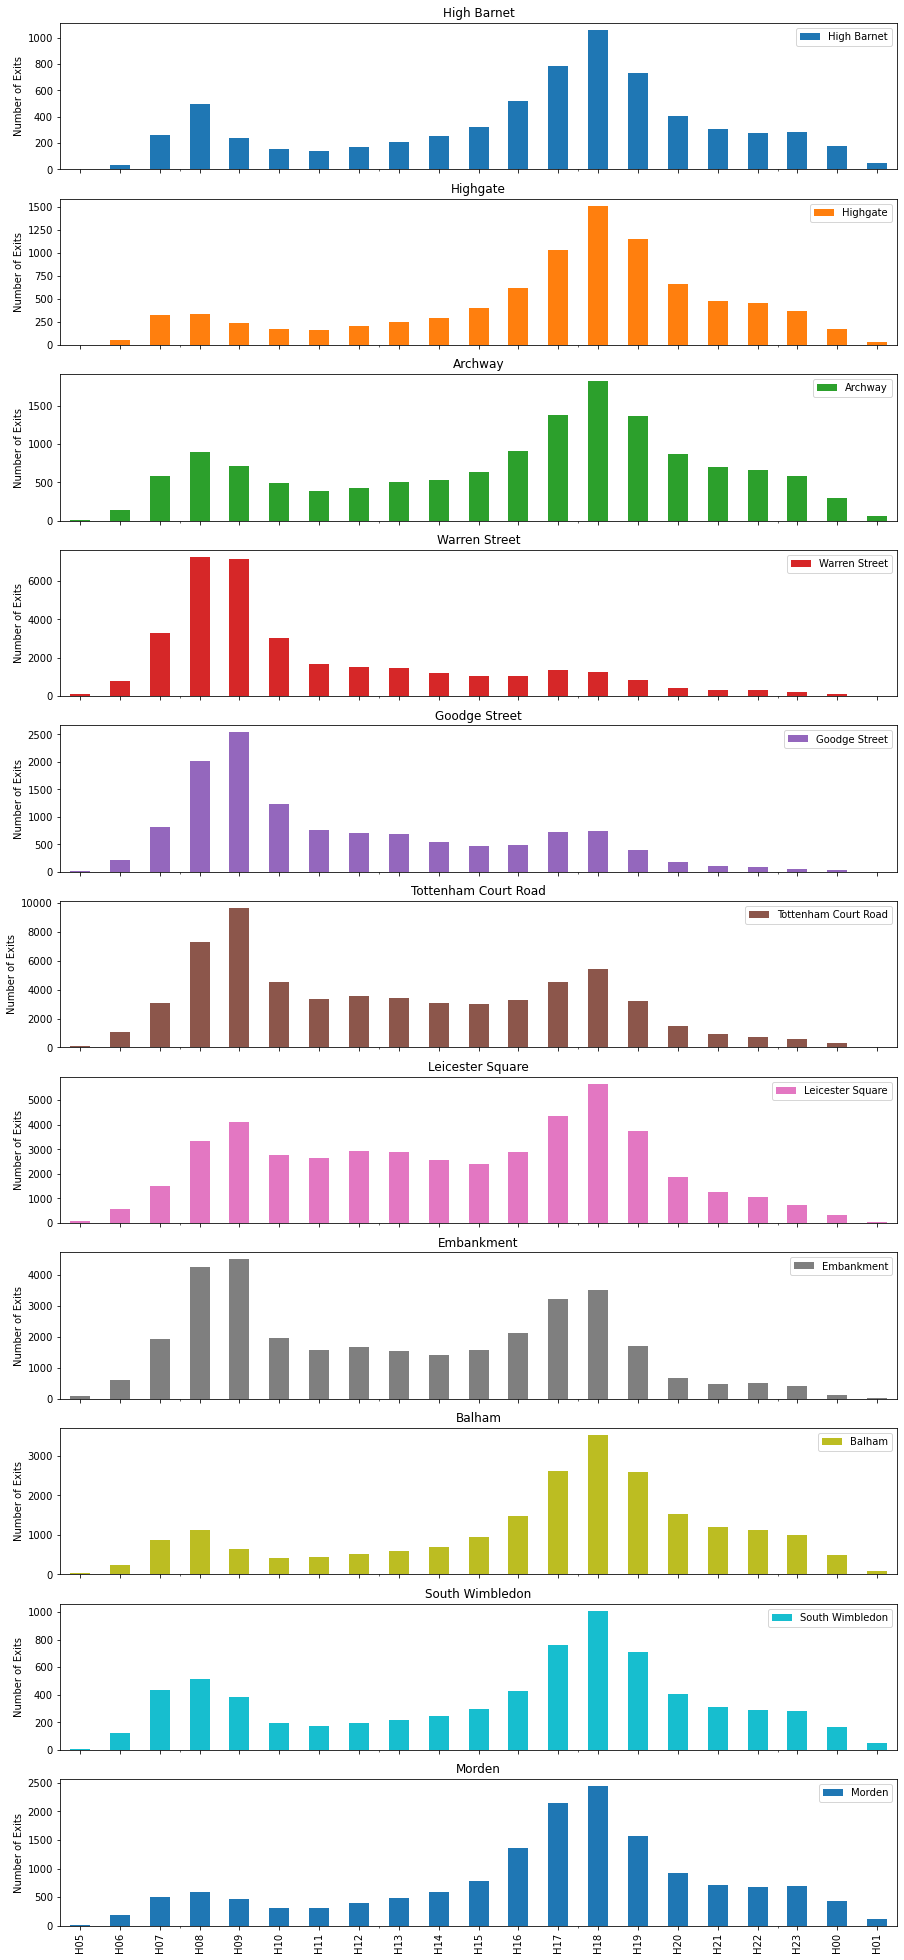

In [ ]:
# Plotting distribution of hourly exits for subset of Northern Line stations in north-to-south order
stations = safe_df1.loc[['High Barnet', 'Highgate', 'Archway', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 
                        'Leicester Square', 'Embankment', 'Balham', 'South Wimbledon', 'Morden']]
ax = stations.transpose().plot(kind='bar', subplots=True, figsize=(15,35), ylabel='Number of Exits', sharey=False)

**Section 4: Further Evidence in Support of Explanation**

This classification above and the reasons behind it can be further confirmed with the observation of identical distributions in plots of west-to-east cross-section of London stations in figures 4.1, 4.2 and 4.3 below. The following Central Line stations (arranged westernmost to easternmost)  are used: West Ruislip, Northolt, Perivale, Hanger Lane, Notting Hill Gate, Oxford Circus, Holborn, Liverpool Street, Mile End, Leytonstone, Fairlop.

> **Section 4.1: West-to-East AM Peak Proportions**

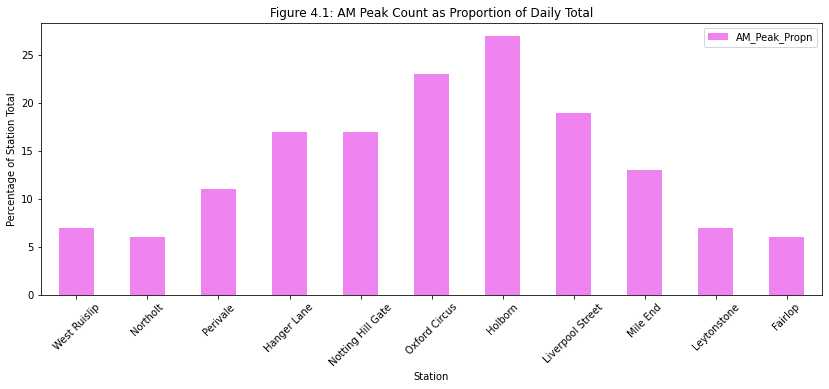

In [ ]:
# Visualising west-to-east AM peak proportions
am_peak_prop_visual = am_peak_prop.loc[['West Ruislip', 'Northolt', 'Perivale', 'Hanger Lane', 'Notting Hill Gate', 'Oxford Circus', 
                                        'Holborn', 'Liverpool Street', 'Mile End', 'Leytonstone', 'Fairlop']]
axtry1 = am_peak_prop_visual.plot(kind='bar', title='Figure 4.1: AM Peak Count as Proportion of Daily Total', xlabel='Station', 
                               ylabel='Percentage of Station Total', figsize=(14,5), color='violet', rot=45)

Observation from Figure 4.1 above shows the distribution of morning peak exit proportions in stations across the city geographically from west to east is unimodal with a slight negative skew and fat tails. In comparison to Figure 2.1, any selection of such few stations compared to the overall number is bound to show slight differences, but the general trend is as observerd in both figures 2.1 and 4.1 - centrally located stations would have higher exit proportions.

> **Section 4.2: West-to-East PM Peak Proportions**

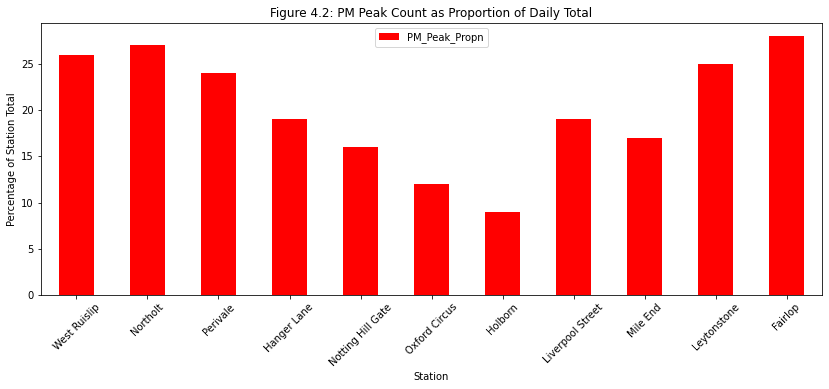

In [ ]:
# Visualising west-to-east PM peak proportions
pm_peak_prop_visual = pm_peak_prop.loc[['West Ruislip', 'Northolt', 'Perivale', 'Hanger Lane', 'Notting Hill Gate', 'Oxford Circus', 
                                        'Holborn', 'Liverpool Street', 'Mile End', 'Leytonstone', 'Fairlop']]
axtry2 = pm_peak_prop_visual.plot(kind='bar', title='Figure 4.2: PM Peak Count as Proportion of Daily Total', xlabel='Station', ylabel='Percentage of Station Total',
                               figsize=(14,5), color='red', rot=45)

It is observed from Figure 4.2 above that similar to the north to south distribution in Figure 2.3, this west to east distribution of evening peak proportions geographically across the city is also bimodal and tending towards arcsine distribution.

> **Section 4.3: Distribution of All Hourly Exits for Subset of Central Line Stations in west-to-east order**

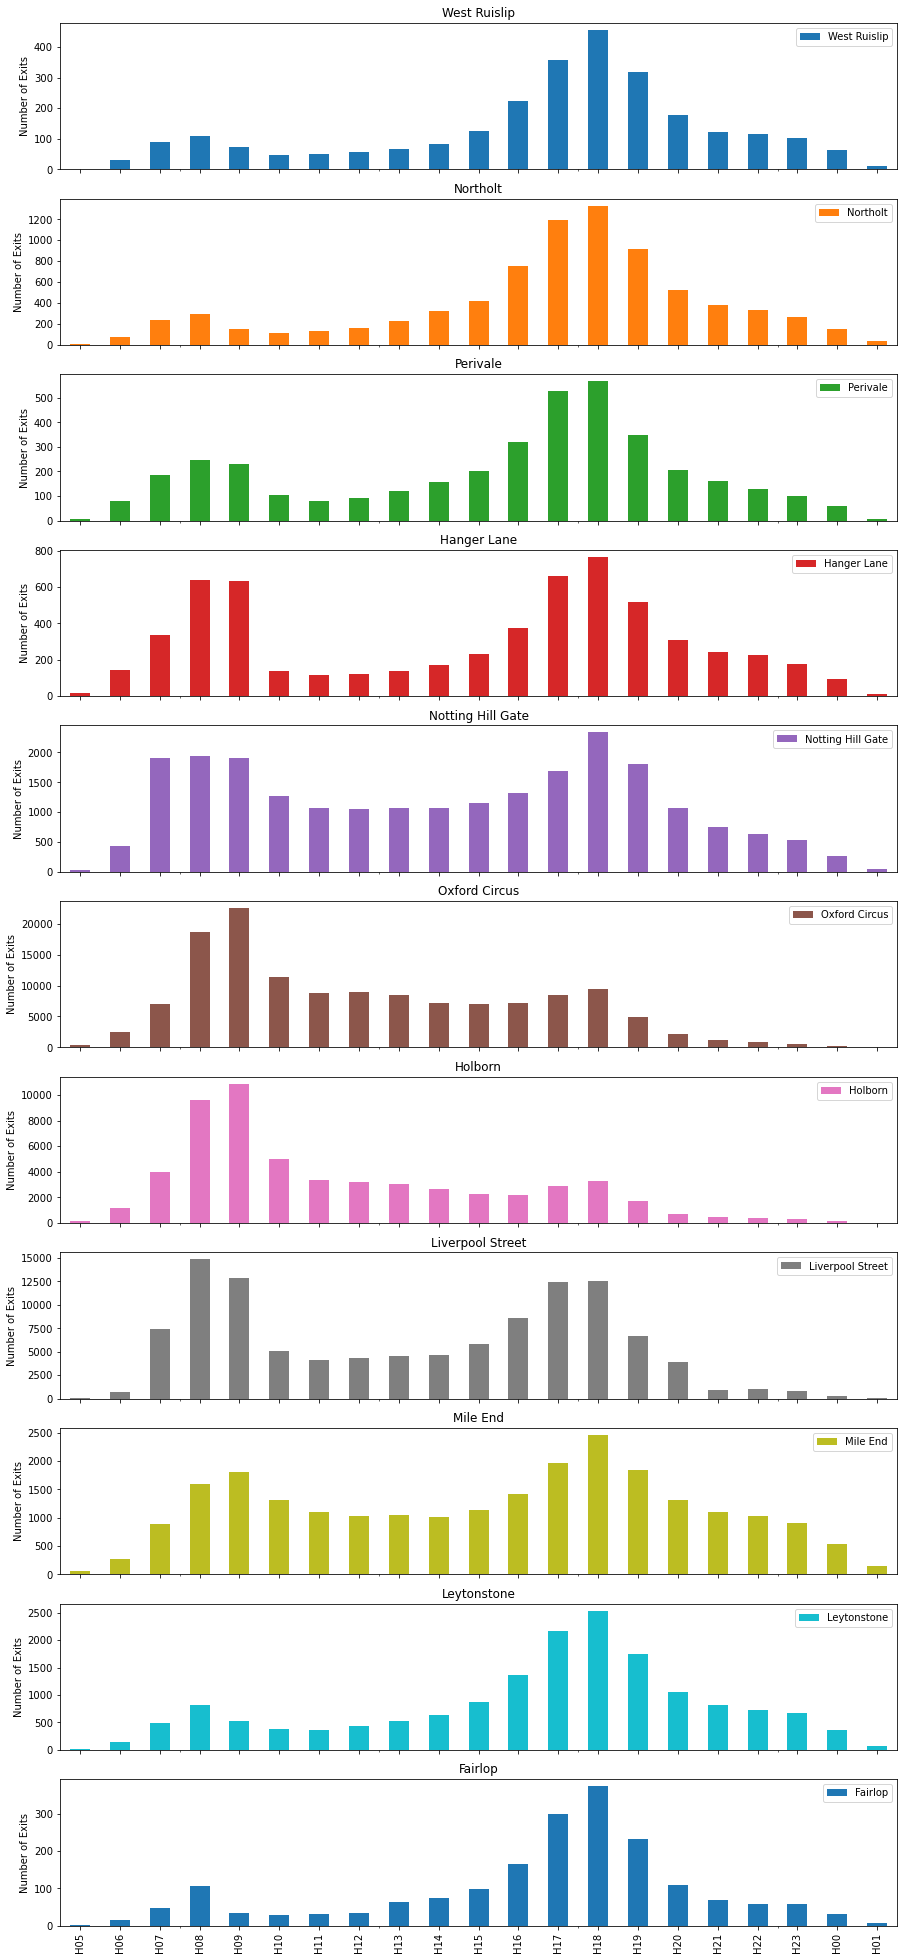

In [ ]:
stations2 = safe_df1.loc[['West Ruislip', 'Northolt', 'Perivale', 'Hanger Lane', 'Notting Hill Gate', 'Oxford Circus', 
                                        'Holborn', 'Liverpool Street', 'Mile End', 'Leytonstone', 'Fairlop']]
axtry3 = stations2.transpose().plot(kind='bar', subplots=True, figsize=(15,35), ylabel='Number of Exits', sharey=False)

## **Conclusion:** Proposed explanation to observed trend is borne out by further analysis.